In [56]:
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)

import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.paths.directory import (
    run_parallel_transfer,
    find_state,
    directory_scratch,
    directory_project,
    directory_archive,
)
import dropbox
from amftrack.transfer.functions.transfer import upload, zip_file
from subprocess import call
from tqdm.autonotebook import tqdm
import checksumdir
import shutil

# directory_origin = r'/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_syncing/'
directory_origin = r"/run/user/357100554/gvfs/smb-share:server=prince.amolf.nl,share=d$/Data/Prince/Images/"
directory_target = (
    r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_syncing/"
)
directory_target = r"/mnt/sun-temp/TEMP/PRINCE_syncing/"

update_plate_info(directory_origin)
update_plate_info(directory_target)

all_folders_origin = get_current_folders(directory_origin)
all_folders_target = get_current_folders(directory_target)

analysed:   0%|          | 0/979 [00:00<?, ?it/s]

analysed:   0%|          | 0/662 [00:00<?, ?it/s]

In [57]:
all_folders_target

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder
795,/mnt/sun-temp/TEMP/PRINCE_syncing/20220319_183...,860,11,'Carrot','A5','001P100N200C','Y','-',20220317,25,...,False,False,False,False,False,False,False,False,"19.03.2022, 18:38:",20220319_1838_Plate11
796,/mnt/sun-temp/TEMP/PRINCE_syncing/20220321_083...,860,11,'Carrot','A5','001P100N200C','Y','-',20220317,25,...,False,False,False,False,False,False,False,False,"21.03.2022, 08:38:",20220321_0838_Plate11
797,/mnt/sun-temp/TEMP/PRINCE_syncing/20220315_070...,845,21,'Carrot','A5','001P100N200C','Y','-',20220222,25,...,False,False,False,False,False,False,False,False,"15.03.2022, 07:06:",20220315_0706_Plate21
798,/mnt/sun-temp/TEMP/PRINCE_syncing/20220316_043...,976,14,'Carrot','C2','001P100N100C','Y','-',20220308,25,...,False,False,False,False,False,False,False,False,"16.03.2022, 04:38:",20220316_0438_Plate14
799,/mnt/sun-temp/TEMP/PRINCE_syncing/20220315_114...,1007,1,'Carrot','C2','001P100N200C','Y','-',20220301,25,...,False,False,False,False,False,False,False,False,"15.03.2022, 11:45:",20220315_1145_Plate01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,/mnt/sun-temp/TEMP/PRINCE_syncing/20220326_012...,860,11,'Carrot','A5','001P100N200C','Y','-',20220317,25,...,False,False,False,False,False,False,False,False,"26.03.2022, 01:26:",20220326_0126_Plate11
1453,/mnt/sun-temp/TEMP/PRINCE_syncing/20220320_202...,836,3,'Carrot','A5','001P100N200C','Y','-',20220311,25,...,False,False,False,False,False,False,False,False,"20.03.2022, 20:24:",20220320_2024_Plate03
1454,/mnt/sun-temp/TEMP/PRINCE_syncing/20220315_015...,862,2,'Carrot','A5','001P100N100C','Y','-',20220311,25,...,False,False,False,False,False,False,False,False,"15.03.2022, 01:59:",20220315_0159_Plate02
1455,/mnt/sun-temp/TEMP/PRINCE_syncing/20220315_112...,953,35,'Carrot','A5','001P100N100C','Y','-',20220301,25,...,False,False,False,False,False,False,False,False,"15.03.2022, 11:21:",20220315_1121_Plate35


In [53]:
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)

import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.paths.directory import (
    run_parallel_transfer,
    find_state,
    directory_scratch,
    directory_project,
    directory_archive,
)
import dropbox
from amftrack.transfer.functions.transfer import upload, zip_file
from subprocess import call
from tqdm.autonotebook import tqdm
import checksumdir
import shutil

directory_origin = (
    r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_syncing/"
)
directory_target = (
    r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_syncing2/"
)

update_plate_info(directory_origin)
update_plate_info(directory_target)

all_folders_origin = get_current_folders(directory_origin)
all_folders_target = get_current_folders(directory_target)
run_info = all_folders_target.copy()
folder_list = list(run_info["folder"])
with tqdm(total=len(folder_list), desc="deleted") as pbar:
    for folder in folder_list:
        origin = all_folders_origin.loc[all_folders_origin["folder"] == folder][
            "total_path"
        ]
        if len(origin) > 0:
            origin = origin.iloc[0]
        else:
            # print(folder)
            continue
        target = all_folders_target.loc[all_folders_target["folder"] == folder][
            "total_path"
        ].iloc[0]
        check_or = checksumdir.dirhash(origin)
        check_targ = checksumdir.dirhash(target)
        print(folder, (check_or == check_targ))

        if check_or == check_targ:
            shutil.rmtree(origin)
        pbar.update(1)

analysed:   0%|          | 0/19 [00:00<?, ?it/s]

analysed:   0%|          | 0/7 [00:00<?, ?it/s]

deleted:   0%|          | 0/7 [00:00<?, ?it/s]

20220307_0922_Plate01 True
20220308_0710_Plate01 True
20220308_0713_Plate02 True
20220308_0721_Plate04 True
20220308_0717_Plate03 True


In [51]:
all_folders_origin

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,Temperature


In [52]:
all_folders_target

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,Temperature
29058,/mnt/sun/home-folder/oyartegalvez/Drive_AMFtop...,752,28,'Carrot','B12','100P100N','Y','-',20210827,False,...,False,False,False,False,False,False,"07.03.2022, 09:22:",20220307_0922_Plate01,NaN,NaN
29059,/mnt/sun/home-folder/oyartegalvez/Drive_AMFtop...,875,5,'Carrot','A5','001P100N200C','Y','-',20220301,False,...,False,False,False,False,False,False,"08.03.2022, 07:25:",20220308_0725_Plate05,NaN,25
29060,/mnt/sun/home-folder/oyartegalvez/Drive_AMFtop...,752,28,'Carrot','B12','100P100N','Y','-',20210827,False,...,False,False,False,False,False,False,"08.03.2022, 06:57:",20220308_0657_Plate01,NaN,NaN
29061,/mnt/sun/home-folder/oyartegalvez/Drive_AMFtop...,1007,1,'Carrot','C2','001P100N200C','Y','-',20220301,False,...,False,False,False,False,False,False,"08.03.2022, 07:10:",20220308_0710_Plate01,NaN,25
29062,/mnt/sun/home-folder/oyartegalvez/Drive_AMFtop...,1009,2,'Carrot','C2','001P100N100C','Y','-',20220301,False,...,False,False,False,False,False,False,"08.03.2022, 07:13:",20220308_0713_Plate02,NaN,25


In [49]:
folder

'20220307_0922_Plate01'

In [44]:
directory = "/run/user/357100554/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data,user=bisot/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE/"
directory = "/media/bisot/AMF_05/PRINCE/"
# update_plate_info(directory)

all_folders = get_current_folders(directory)
# all_folders_drop = get_current_folders("dropbox")
all_folders_drop = get_current_folders("dropbox", True)
real_drop_folder = all_folders_drop.loc[all_folders_drop["size"] > 0.6]
folders = all_folders.loc[
    all_folders["folder"].isin(real_drop_folder["folder"]) == False
]

KeyError: 'size'

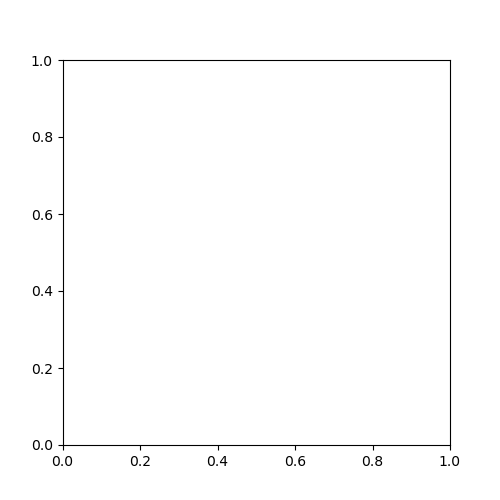

In [47]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.hist(folders["size"], 20)

In [22]:
directory_origin = (
    r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_sync_test/"
)
directory_target = (
    r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_analysis/"
)

update_plate_info(directory_origin)
update_plate_info(directory_target)

all_folders_origin = get_current_folders(directory_origin)
all_folders_target = get_current_folders(directory_target)

analysed:   0%|          | 0/19 [00:00<?, ?it/s]

analysed:   0%|          | 0/10 [00:00<?, ?it/s]

In [37]:
run_info = all_folders_target.copy()
folder_list = list(run_info["folder"])
with tqdm(total=len(folder_list), desc="transferred") as pbar:
    for folder in folder_list:
        origin = all_folders_origin.loc[all_folders_origin["folder"] == folder][
            "total_path"
        ].iloc[0]
        target = all_folders_target.loc[all_folders_target["folder"] == folder][
            "total_path"
        ].iloc[0]
        check_or = checksumdir.dirhash(origin)
        check_targ = checksumdir.dirhash(target)
        print(folder, (check_or == check_targ))

        if check_or == check_targ:
            shutil.rmtree(origin)
        pbar.update(1)

transferred:   0%|          | 0/10 [00:00<?, ?it/s]

20220308_0729_Plate06 True
20220308_0725_Plate05 False
20220308_0713_Plate02 True
20220308_0732_Plate07 True
20220308_0736_Plate08 True
20220307_0922_Plate01 True
20220308_0710_Plate01 True
20220308_0657_Plate01 True
20220308_0721_Plate04 True
20220308_0717_Plate03 True


In [33]:
origin, target

('/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_sync_test/20220308_0729_Plate06',
 '/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_analysis/20220308_0729_Plate06')

In [61]:
run_info = folders.copy()
target = directory2
folder_list = list(run_info["total_path"])
with tqdm(total=len(folder_list), desc="transferred") as pbar:
    for folder in folder_list:
        origin = folder
        copy = target + "/" + folder.split("/")[-1]
        break

transferred:   0%|          | 0/31 [00:00<?, ?it/s]

In [63]:
origin, copy

('/run/user/357100554/gvfs/smb-share:server=prince.amolf.nl,share=d$/Data/Prince/Images/20220307_0922_Plate01',
 '/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_sync_test/20220307_0922_Plate01')

In [64]:
import checksumdir

D

('14d575547c25462ce0b349a91b0b8dc9', '14d575547c25462ce0b349a91b0b8dc9')

In [56]:
checksumdir.dirhash(origin)

'14d575547c25462ce0b349a91b0b8dc9'

In [57]:
checksumdir.dirhash(target)

'74fd3bba045fb73e7d500d2be0bc86fe'

In [ ]:
def get_current_folders(directory, file_metadata=False):
    if directory == "dropbox":
        data = []
        dbx = dropbox.Dropbox(API)
        response = dbx.files_list_folder("", recursive=True)
        # for fil in response.entries:
        listfiles = []
        listjson = []
        while response.has_more:
            listfiles += [
                file for file in response.entries if file.name.split(".")[-1] == "zip"
            ]
            listjson += [
                file.path_lower
                for file in response.entries
                if file.name.split(".")[-1] == "json"
            ]

            response = dbx.files_list_folder_continue(response.cursor)
        listfiles += [
            file for file in response.entries if file.name.split(".")[-1] == "zip"
        ]
        listjson += [
            file.path_lower
            for file in response.entries
            if file.name.split(".")[-1] == "json"
        ]
        # print([((file.path_lower.split(".")[0]) + "_info.json") for file in listfiles if (file.name.split(".")[-1] == "zip") &
        #        (((file.path_lower.split(".")[0]) + "_info.json") not in listjson)])
        listfiles.reverse()
        if file_metadata:
            return listfiles

In [ ]:
files = get_current_folders("dropbox", True)
files[0]